In [1]:
cd(@__DIR__);
println(pwd());

using Pkg;
Pkg.activate(pwd());
packages = ["Plots","Glob","JLD2","BenchmarkTools","Distributions","SymbolicRegression","SymbolicUtils","LaTeXStrings"]
deps = Pkg.project().dependencies;
for pkg in packages
    if pkg ∉ keys(deps)
        Pkg.add(pkg);
    end
end

/home/vfegger/projects/HTSR


  Activating project at `~/projects/HTSR`


In [26]:
using SymbolicRegression, SymbolicUtils, Plots, JLD2

inv(x) = 1.0 / x
options = Options(
    binary_operators=(+, *, ^),
    unary_operators=(inv, -, log, exp),
    batching=true,
    ncyclesperiteration=512,
    maxsize=40,
    populations=100,
    population_size=150
)

trees, complexity = load_object("Data/Case3_1024Trees.jdl")

(Node{Float64}[0.48826668925067007, 0.8569535170203804 * x2, log(1.1598185859613703 + x2), (x2 ^ 0.233665125533965) + -0.32316734523813295, 0.26950809289418043 ^ inv(x3 ^ x2), ((x3 * x2) ^ 0.16476080916810484) + -0.5859177861435009, inv(inv(x3) + (1.1789702778945812 ^ inv(x2))), (inv(x3) + (1.1071411300058027 ^ inv(x2))) ^ -1.3597282900597665, ((1.0780086298563782 ^ (x2 ^ -1.1560073753562985)) + inv(x3)) ^ -1.4380181890971542, (((1.107524062630215 ^ inv(x2)) + -0.05450731389508053) + inv(x3)) ^ -1.47538511429496  …  (inv((((log(x2) * -0.4486365232783749) + 0.29835366338157077) ^ 4.107740017820231) + ((((0.0038578998913498916 ^ x2) * -1.5325073590278435) + (x3 + 2.0365934078802406)) * inv(x3))) ^ inv(0.9879531384834342 ^ x3)) + x1, x1 + (inv((((x3 + 2.0344888146670153) + -((0.05087468366102951 ^ exp(x2)) ^ x2)) * inv(x3)) + (((log(x2) * -0.4486365232783749) + 0.29835366338157077) ^ 4.099044602938236)) ^ (1.0118977879001052 ^ x3)), (inv((((x3 + 2.0404870868500713) + -((x3 * (1.8683495380

In [27]:
display(trees)

31-element Vector{Node{Float64}}:
 0.48826668925067007
 0.8569535170203804 * x2
 log(1.1598185859613703 + x2)
 (x2 ^ 0.233665125533965) + -0.32316734523813295
 0.26950809289418043 ^ inv(x3 ^ x2)
 ((x3 * x2) ^ 0.16476080916810484) + -0.5859177861435009
 inv(inv(x3) + (1.1789702778945812 ^ inv(x2)))
 (inv(x3) + (1.1071411300058027 ^ inv(x2))) ^ -1.3597282900597665
 ((1.0780086298563782 ^ (x2 ^ -1.1560073753562985)) + inv(x3)) ^ -1.4380181890971542
 (((1.107524062630215 ^ inv(x2)) + -0.05450731389508053) + inv(x3)) ^ -1.47538511429496
 ⋮
 x1 + (inv((((x3 + 2.0344888146670153) + -((0.05087468366102951 ^ exp(x2)) ^ x2)) * inv(x3)) + (((log(x2) * -0.4486365232783749) + 0.29835366338157077) ^ 4.099044602938236)) ^ (1.0118977879001052 ^ x3))
 (inv((((x3 + 2.0404870868500713) + -((x3 * (1.8683495380975136e-5 ^ x2)) ^ x2)) * inv(x3)) + (((log(x2) * -0.44748455552866806) + 0.32370104917970444) ^ 4.088931709273715)) ^ (1.0093324807288444 ^ x3)) + x1
 x1 + (inv(((-((x3 * (0.0432526278429831 ^ exp(x

In [28]:
display(complexity)

31-element Vector{Int64}:
  1
  3
  4
  5
  6
  7
  8
  9
 10
 11
  ⋮
 30
 31
 32
 34
 36
 37
 38
 39
 40

In [29]:
for (tree, index) ∈ zip(trees, complexity)
    eqn = node_to_symbolic(tree, options)
    println(simplify(eqn))
end

0.48826668925067007
0.8569535170203804 * x2
log(1.1598185859613703 + x2)
-0.32316734523813295 + (x2 ^ 0.233665125533965)
0.26950809289418043 ^ (1.0 / (x3 ^ x2))
-0.5859177861435009 + ((x2 * x3) ^ 0.16476080916810484)
1.0 / ((1.1789702778945812 ^ (1.0 / x2)) + (1.0 / x3))
((1.1071411300058027 ^ (1.0 / x2)) + (1.0 / x3)) ^ -1.3597282900597665
((1.0 / x3) + (1.0780086298563782 ^ (x2 ^ -1.1560073753562985))) ^ -1.4380181890971542
(-0.05450731389508053 + (1.0 / x3) + (1.107524062630215 ^ (1.0 / x2))) ^ -1.47538511429496
1.0 / (exp(x3 ^ -0.59842489571034) + ((-0.6467420303918245 * log(x2)) ^ 3.1089559994159095))
1.0 / ((2.907917116438036 ^ (x3 ^ -0.6326641466849534)) + ((-0.6439343618393145 * log(x2)) ^ 3.150793766219318))
1.0 / (1.0796643415361618 + (1.916350352212111 * (1.0 / x3)) + ((-0.6459387288293947 * log(x2)) ^ 3.1166991970181246))
1.0 / (1.0623905621400591 + (1.9148870556271405 * (1.0 / x3)) + ((0.2644126271473548 + (-0.47280645134251537 * log(x2))) ^ 4.1488744333556165))
(1.0 / (1.

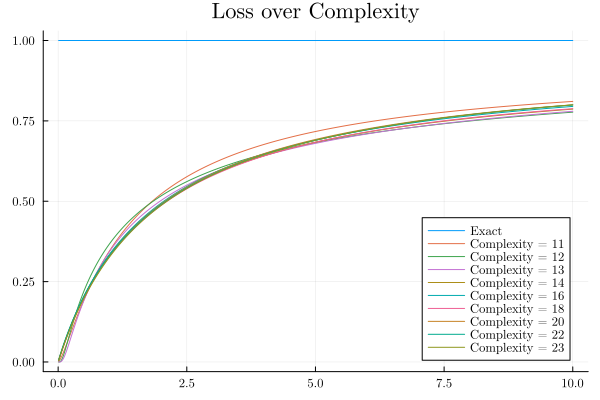

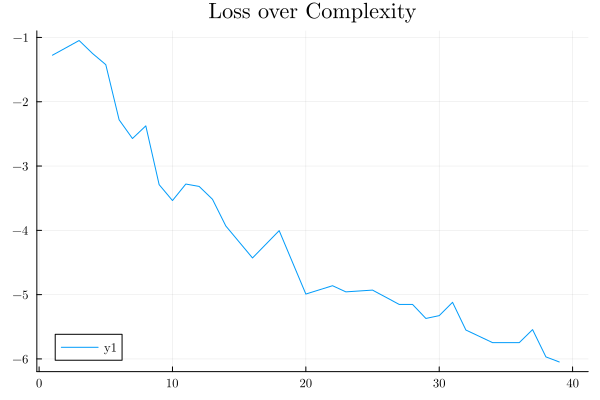

In [78]:
using LaTeXStrings

n = 10000
dataX = Array{Float64,2}(undef, 3, n)
dataX[1, :] .= 1e-5
dataX[2, :] .= 1
dataX[3, :] .= range(1e-2, 1e1, n)

plot_font = "Computer Modern"
default(fontfamily=plot_font)
plt = plot(title="Loss over Complexity", dp=1000)
f(x) = 1
plot!(dataX[3, :], f.(dataX[3, :]), label = "Exact")
for (tree, index) ∈ zip(trees, complexity)
    result, worked = eval_tree_array(tree, dataX, options)
    if worked
        if (index < 25 && index > 10)
            plot!(dataX[3, :], result, label="Complexity = " * string(index))
        end
    else
        println("NaN or Infinity detected.")

    end
end
display(plt)

plt = plot(title="Loss over Complexity", dp=1000)
ϵ = [sum(abs2, eval_tree_array(tree, dataX, options)[1] - eval_tree_array(trees[end], dataX, options)[1]) / n for tree ∈ trees]
plot!(complexity, log10.(ϵ))
display(plt)